# Ensemble Learning

### churn prediction
- predict if a customer will exit the bank

In [1]:
# pre-requisites
import warnings
warnings.filterwarnings(action="ignore")

In [2]:
# import required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# load the data
df = pd.read_csv('Churn_Modelling.csv')
df.head(3)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


### exploratory data analysis

In [4]:
#get the general information about the df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
# check for missing records
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

### data cleansing

In [6]:
# remove the unwanted columns
df.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)


In [7]:
# convert the non-numerical columns to numeric ones
from sklearn.preprocessing import LabelEncoder

df['Geography'] = LabelEncoder().fit_transform(df['Geography'])
df['Gender'] = LabelEncoder().fit_transform(df['Gender'])

In [8]:
# correlation analysis
df.corr()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,0.007888,-0.002857,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Geography,0.007888,1.000000,0.004719,0.022812,0.003739,0.069408,0.003972,-0.008523,0.006724,-0.001369,0.035943
Gender,-0.002857,0.004719,1.000000,-0.027544,0.014733,0.012087,-0.021859,0.005766,0.022544,-0.008112,-0.106512
Age,-0.003965,0.022812,-0.027544,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,0.000842,0.003739,0.014733,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,0.006268,0.069408,0.012087,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.012238,0.003972,-0.021859,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.005458,-0.008523,0.005766,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.025651,0.006724,0.022544,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.001384,-0.001369,-0.008112,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


In [9]:
# check if some data is not significant data
df.drop('EstimatedSalary',axis=1,inplace=True)

### split the data

In [10]:
# create x
x= df.drop('Exited',axis=1)

# create y
y = df['Exited']

In [14]:
# split the data into train and test sets

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8,random_state=123456)

### model building

In [22]:
from sklearn.ensemble import RandomForestClassifier

# create a model
model = RandomForestClassifier(n_estimators=60,max_depth=10)

# train the model
model.fit(x_train,y_train)

,n_estimators,60
,criterion,'gini'
,max_depth,10
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [16]:
# find the best values of hyper-paramters using GridSearch
from sklearn.model_selection import GridSearchCV

parameters = {
    'n_estimators':[50,60,70,80,90],
    'max_depth':[5,10,15,20,25,30,35,40,45]
}

grid_search = GridSearchCV(model,param_grid=parameters)

grid_search.fit(x_train,y_train)

,estimator,RandomForestC...estimators=50)
,param_grid,"{'max_depth': [5, 10, ...], 'n_estimators': [50, 60, ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,None
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,80


In [17]:
# # get the best params
grid_search.best_params_

{'max_depth': 10, 'n_estimators': 80}

#### model evaluation

In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"accuracy = {accuracy:.2f}")
print(f"precision = {precision:.2f}")
print(f"recall = {recall:.2f}")
print(f"f1 = {f1:.2f}")

accuracy = 0.85
precision = 0.80
recall = 0.38
f1 = 0.51


In [19]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91      1585
           1       0.79      0.37      0.51       415

    accuracy                           0.85      2000
   macro avg       0.83      0.67      0.71      2000
weighted avg       0.84      0.85      0.83      2000



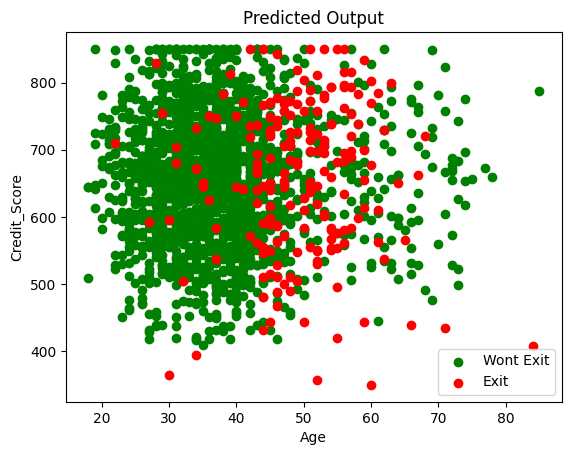

In [24]:
plt.scatter(x_test['Age'][y_pred==0],x_test['CreditScore'][y_pred==0],color="green",label ="Wont Exit")
plt.scatter(x_test['Age'][y_pred==1],x_test['CreditScore'][y_pred==1],color="red",label ="Exit")
plt.xlabel("Age")
plt.ylabel("Credit_Score")
plt.title("Predicted Output")
plt.legend()

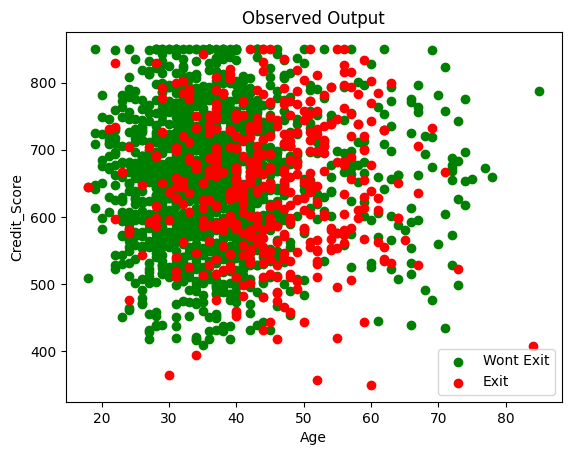

In [25]:
plt.scatter(x_test['Age'][y_test==0],x_test['CreditScore'][y_test==0],color="green",label ="Wont Exit")
plt.scatter(x_test['Age'][y_test==1],x_test['CreditScore'][y_test==1],color="red",label ="Exit")
plt.xlabel("Age")
plt.ylabel("Credit_Score")
plt.title("Observed Output")
plt.legend()